In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
rootPath = '/Users/jiangyue/desktop/Linear_regression/Salary_Data.csv'
dataset = pd.read_csv(rootPath)

In [3]:
# number of x' feature is one  
x = dataset.loc[:,['YearsExperience']].values
y = dataset.loc[:,['Salary']]

In [4]:
# splitting the dataset into the training set and the test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=4/5, random_state=0)

In [5]:
# init feature 
n_feature = 1

[[26780.09915063]
 [ 9312.57512673]]
error of least square method: 12823412.298126375


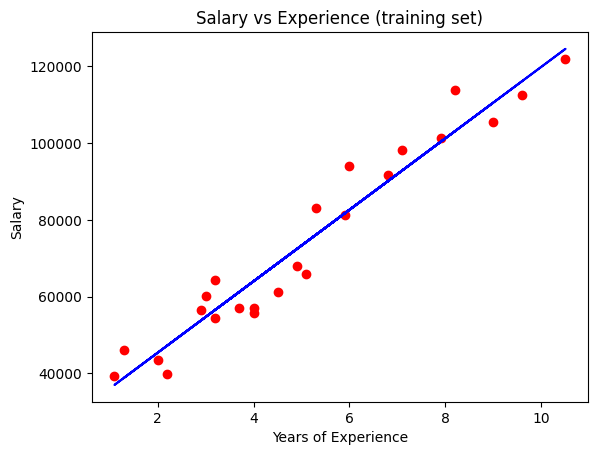

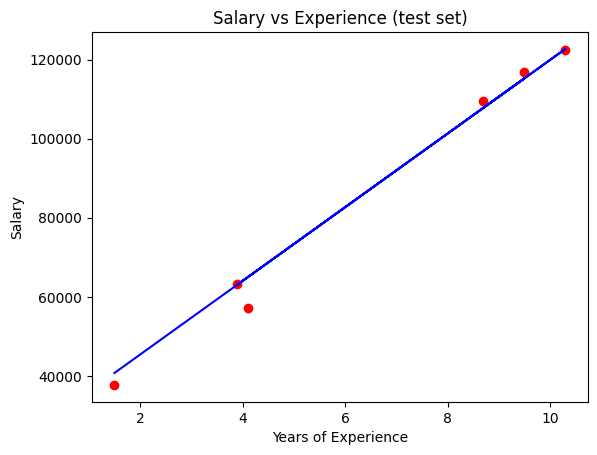

In [6]:
# solution1 we use least square method
# we need to add a feature into x to represent b

x_train_1 = np.concatenate((np.array([1]*x_train.shape[0]).reshape(x_train.shape), x_train), axis=1)
x_test_1 = np.concatenate((np.array([1]*x_test.shape[0]).reshape(x_test.shape), x_test), axis=1)
w_best = np.linalg.inv(x_train_1.T.dot(x_train_1)).dot(x_train_1.T).dot(y_train)
print(w_best)
y_train_pre = x_train_1.dot(w_best)
y_test_pre = x_test_1.dot(w_best)
err = np.mean((y_test_pre-y_test)**2)
print(f'error of least square method: {err}')

plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, y_train_pre, color='blue')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
# visualising the test set results
plt.scatter(x_test, y_test, color='red')
# here we use any of x_train or x_test, it's ok, because it represents a straight line
plt.plot(x_test, y_test_pre, color='blue')
plt.title('Salary vs Experience (test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

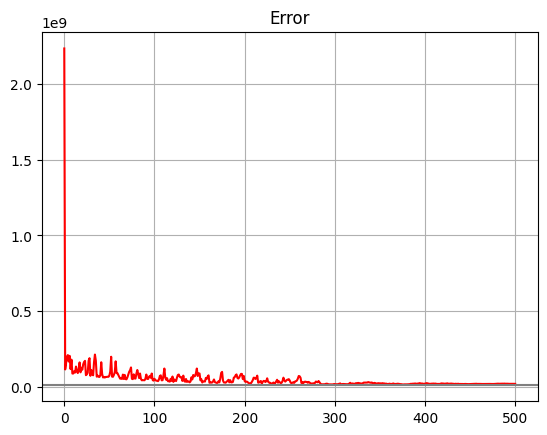

error of gradient descent method: 18312683.514733836


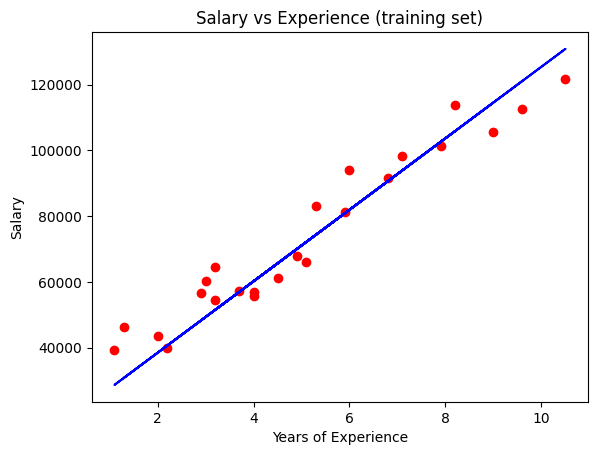

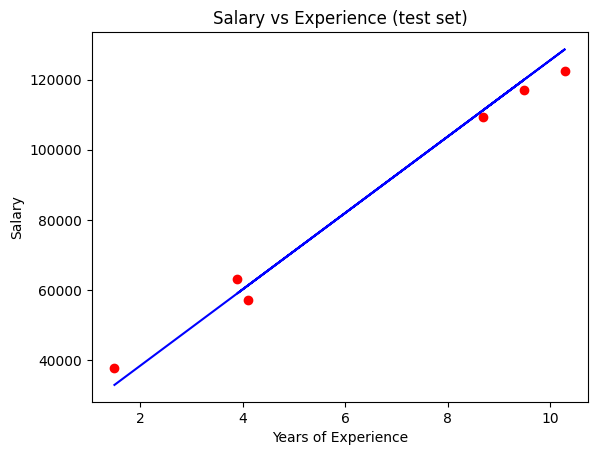

In [7]:
# solution2 we use gradient descent
err_list = []
# super parameter
batch_num = 5 # small batch updated
# batch_num = x_train.shape[0] # all samples as a batch
epochs = 500
e = 0
lr = 0.01
# init w and b
w = np.random.normal(0,1,(n_feature+1,1)) # 1 is for b
import math
while e <= epochs:
    idx = random.sample(list(range(x_train.shape[0])), batch_num)
    x_train_1 = np.concatenate((np.array([1]*x_train.shape[0]).reshape(x_train.shape), x_train), axis=1)
    x_test_1 = np.concatenate((np.array([1]*x_test.shape[0]).reshape(x_test.shape), x_test), axis=1)
    x_train_chosen = x_train_1[idx]
    y_train_chosen = y_train.values[idx]
    # x_train_chosen = x_train_1 # all samples as a batch
    # y_train_chosen = y_train.values
    delta = -2*(x_train_chosen.T.dot(x_train_chosen).dot(w) - x_train_chosen.T.dot(y_train_chosen))
    w = w + lr*1/batch_num*delta
    y_test_pre = x_test_1.dot(w)
    mse = np.mean((y_test-y_test_pre)**2)
    err_list.append(mse)
    e = e+1
    lr = 1/(1+e*0.00003) * lr # if we use all samples, don't need learning rate decay.
errs =  pd.Series(err_list).astype(float)
errs.plot(kind='line', grid = True, label= 'S1', title='Error', color='red')
plt.axhline(float(err),color='gray')
plt.show()

y_train_pre = x_train_1.dot(w)
y_test_pre = x_test_1.dot(w)
err = np.mean((y_test_pre-y_test)**2)
print(f'error of gradient descent method: {err}')


plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, y_train_pre, color='blue')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
# visualising the test set results
plt.scatter(x_test, y_test, color='red')
# here we use any of x_train or x_test, it's ok, because it represents a straight line
plt.plot(x_test, y_test_pre, color='blue')
plt.title('Salary vs Experience (test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()



Using three methods—batch gradient descent, mini-batch gradient descent, and the least squares method—to compute the linear regression function:

The least squares method clearly finds the minimum of the loss function, reaching the optimal solution for training.

Batch gradient descent can approach the optimal solution but faces the issue of vanishing gradients as it nears the minimum, resulting in minimal further descent. 
The loss curve (on the training set) is smooth due to the full-sample regression function, meaning the descent direction is always correct since it represents the entire objective.

Mini-batch gradient descent can also approach the minimum solution; however, unlike batch gradient descent, its loss curve fluctuates significantly. 
This is because small samples cannot fully represent the overall distribution—the smaller the sample, the greater the difference, leading to fluctuations as the gradient calculations from these samples don’t entirely match the full regression function.
This method can also approach the minimum solution, but if the learning rate isn’t reduced over time, the fluctuations become more pronounced, preventing effective convergence. Reducing the learning rate enables it to approach the optimal solution more closely.
